In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

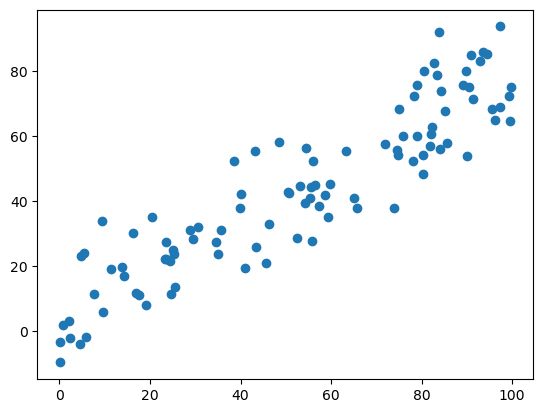

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## demean过程 这一步完成了向量化

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

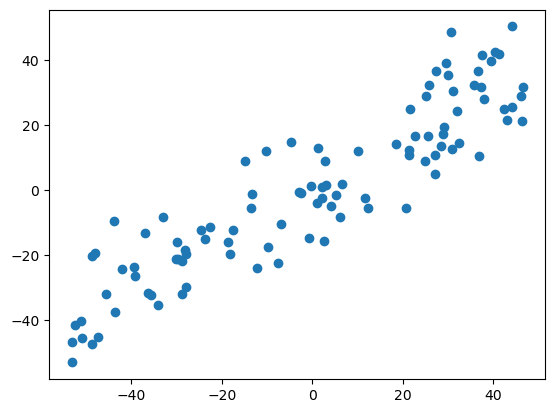

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

## 梯度上升法

In [7]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [29]:
def f(X, w):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [30]:
def df_debug(X, w, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(X, w_1) - f(X, w_2)) / (2 * epsilon)
    return res

In [31]:
def direction(w):
    return w / np.linalg.norm(w)

# 注意1：w求单位方向

In [32]:
def gradient_ascent(df, X, initial_w, eta, iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < iters:
        gradient = df(X, w)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1：w每次求一个单位方向
        if (abs(f(X, w) - f(X, last_w)) < epsilon):
            break
            
        cur_iter += 1
    
    return w

# 注意2：不能用0向量开始

In [33]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.54640031, 0.1887491 ])

In [34]:
eta = 0.001

# 注意3：不能使用StandardScaler标准化数据

In [36]:
gradient_ascent(df_debug, X_demean, w, eta)

array([[0.55039785, 0.44391689],
       [0.55039785, 0.44391689]])

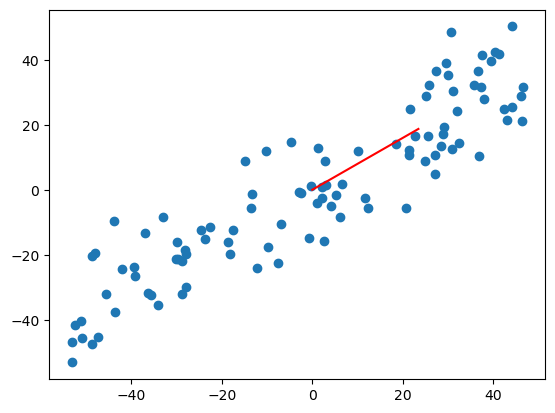

In [37]:
w = gradient_ascent(df_debug, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

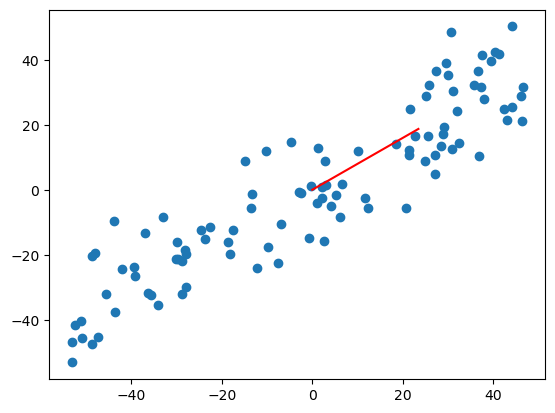

In [39]:
w2 = gradient_ascent(df_debug, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

## 随机梯度上升法

In [40]:
def df(X, w):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [41]:
def f(X, w):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [42]:
def sga(df, X_demean, initial_w, iters=1):
    
    
    def learning_rate(t, t0=5, t1=50):
        return t0 / (t + t1)
    
    m = len(X_demean)
    w = direction(initial_w)
    
    for cur_iter in range(iters):
        indexes = np.random.permutation(m)
        X_new = X_demean[indexes]
        
        for i in range(m):
            gradient = df(X_new[i], w)
            w = w + learning_rate(cur_iter * m + i) * gradient
            w = direction(w)# 注意1：m每次求一个单位方向
            # print(cur_iter * m + i)
    return w

In [43]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. #+ np.random.normal(0, 10., size=100)
X_demean = demean(X)

Wall time: 2.99 ms
[-0.94519414 -0.32650887]


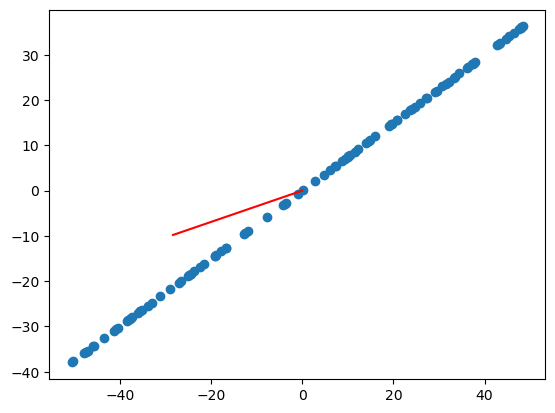

In [51]:
%time w = sga(df_math, X_demean, initial_w)
print(w)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

## 小批量随机梯度上升法

In [48]:
def mbga(df, X_demean, initial_w, iters=1, k=1):
    
    def learning_rate(t, t0=5, t1=50):
        return t0 / (t + t1)
    
    m = len(X_demean)
    w = direction(initial_w)
    
    for cur_iter in range(iters):
        
        indexes = np.random.permutation(m)
        X_new = X_demean[indexes]
        
        for i in range(m // k):
            rand_k = np.arange(i * k, (i + 1) * k)
            gradient = df(w, X_new[rand_k])
            w = w + learning_rate(cur_iter * (m // k) + i) * gradient
            w = direction(w)# 注意1：m每次求一个单位方向
            #print(cur_iter * (m // k) + i)
    return w

In [49]:
%time w = mbga(df_math, X_demean, initial_w)
w

Wall time: 1.99 ms


array([0.8, 0.6])